# Fig 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import json
# color map
import matplotlib.cm as cm

In [3]:
with (open("../data/20241022_score_dict_kcat.json", "r")) as f:
    jsonified_kcat_score_dict = json.load(f)
with (open("../data/20241022_score_dict_km.json", "r")) as f:
    jsonified_km_score_dict = json.load(f)

In [4]:
for key in jsonified_kcat_score_dict.keys():
    jsonified_kcat_score_dict[key] = np.array(jsonified_kcat_score_dict[key])
for key in jsonified_km_score_dict.keys():
    jsonified_km_score_dict[key] = np.array(jsonified_km_score_dict[key])

In [5]:
kcat_score_dict = jsonified_kcat_score_dict
km_score_dict = jsonified_km_score_dict

In [6]:
dlkcat_spearman_r = -0.09 # as of 7/17

In [10]:
def confidence_interval(data, z=1.96):
    n = len(data)
    std_err = np.std(data)/np.sqrt(n)
    return z*std_err

## Protein NPT Results
___

In [11]:
pascal_pnpt_results = pd.read_csv("/Users/duncanmuir/Downloads/20240822_kinase_performance - detailed_results.csv")

In [12]:
pnpt_models = [
    "kinase_20240822_multi4_PNPT_Tranception",  
    "kinase_20240822_multi4_PNPT_ESM2",
    "kinase_20240822_multi4_Tranception",
    "kinase_20240822_multi4_ESM2"
]

In [13]:
pnpt_results = pascal_pnpt_results[pascal_pnpt_results["model_name_suffix"].isin(pnpt_models)][["Spearman_log10_kcat","fold_variable_name", "model_name_suffix"]].copy()
pnpt_results["train_size"] = pnpt_results["fold_variable_name"].apply(lambda x: int(x.split("_")[-1]))
pnpt_results = pnpt_results.groupby(["model_name_suffix", "train_size"]).agg({"Spearman_log10_kcat": ["mean", "std", confidence_interval]}).reset_index()
pnpt_results.columns = ["model_name_suffix", "train_size", "mean_spearman", "std_spearman", "95_CI"]

In [14]:
pnpt_results_km = pascal_pnpt_results[pascal_pnpt_results["model_name_suffix"].isin(pnpt_models)][["Spearman_log10_km","fold_variable_name", "model_name_suffix"]].copy()
pnpt_results_km["train_size"] = pnpt_results_km["fold_variable_name"].apply(lambda x: int(x.split("_")[-1]))
pnpt_results_km = pnpt_results_km.groupby(["model_name_suffix", "train_size"]).agg({"Spearman_log10_km": ["mean", "std", confidence_interval]}).reset_index()
pnpt_results_km.columns = ["model_name_suffix", "train_size", "mean_spearman", "std_spearman", "95_CI"]

In [21]:
colors = cm.viridis(np.linspace(0, 1, 4))

## PNPT plot
___

In [15]:
pnpt_models = [
    "kinase_20240822_multi4_PNPT_Tranception",  
    "kinase_20240822_multi4_PNPT_ESM2",
    "kinase_20240822_multi4_Tranception",
    "kinase_20240822_multi4_ESM2"
]

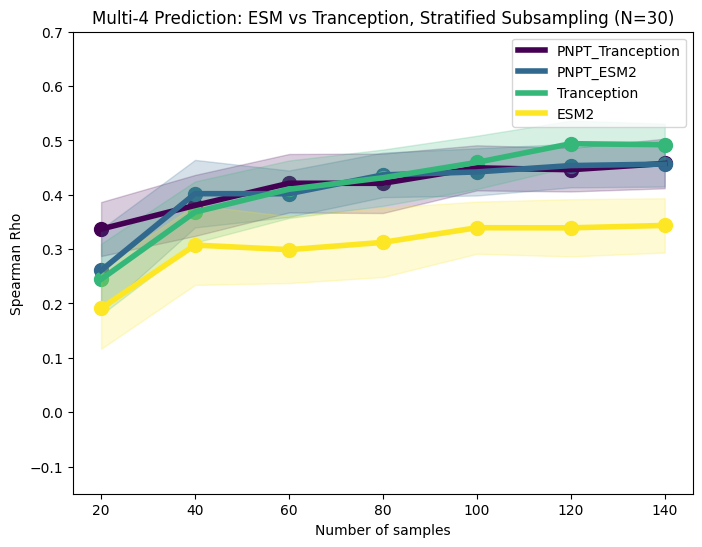

In [40]:
ALPHA = 0.2
fig, ax = plt.subplots(figsize=(8,6))

for i, model_name in enumerate(pnpt_models):
    ax.plot(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == model_name]["mean_spearman"], linewidth=4, label="_".join(model_name.split("_")[3:]), color=colors[i])
    ax.scatter(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == model_name]["mean_spearman"], s=100, color=colors[i])
    ax.fill_between(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == model_name]["mean_spearman"]-pnpt_results[pnpt_results["model_name_suffix"] == model_name]["95_CI"],
                    pnpt_results[pnpt_results["model_name_suffix"] == model_name]["mean_spearman"]+pnpt_results[pnpt_results["model_name_suffix"] == model_name]["95_CI"],
                    alpha=ALPHA,
                    color=colors[i])
    
ax.set_xlabel("Number of samples")
ax.set_ylabel("Spearman Rho")
ax.set_ylim(-0.15,0.7)
ax.legend()
ax.set_title("Multi-4 Prediction: ESM vs Tranception, Stratified Subsampling (N=30)")
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/pnpt_titration.pdf")


## kcat plot
___

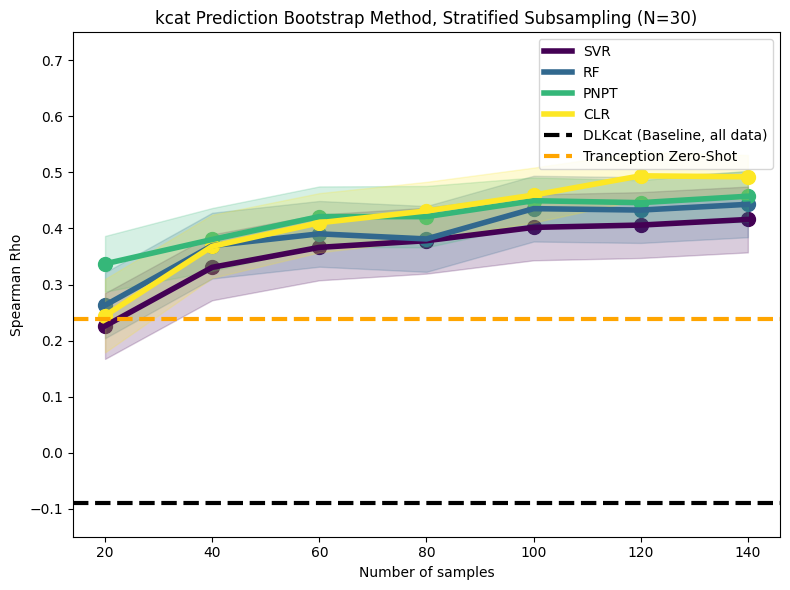

In [115]:
ALPHA = 0.2
# same as above but with confidence intervals shaded
fig, ax = plt.subplots(figsize=(8,6))

# ax.plot(data_set_sizes, np.mean(kcat_score_dict["RF_one-hot"], axis=0), linewidth=4, label="RF (One-Hot)", color=colors[0])
# ax.scatter(data_set_sizes, np.mean(kcat_score_dict["RF_one-hot"], axis=0), s=100, color=colors[0])
# ax.fill_between(data_set_sizes, np.mean(kcat_score_dict["RF_one-hot"], axis=0)-confidence_interval(kcat_score_dict["RF_one-hot"], z=1.96),
#                  np.mean(kcat_score_dict["RF_one-hot"], axis=0)+confidence_interval(kcat_score_dict["RF_one-hot"], z=1.96),
#                    alpha=ALPHA,
#                    color=colors[0])

ax.plot(data_set_sizes, np.mean(kcat_score_dict["SVR_one-hot"], axis=0), linewidth=4, label="SVR", color=colors[0])
ax.scatter(data_set_sizes, np.mean(kcat_score_dict["SVR_one-hot"], axis=0), s=100, color=colors[0])
ax.fill_between(data_set_sizes, np.mean(kcat_score_dict["SVR_one-hot"], axis=0)-confidence_interval(kcat_score_dict["SVR_one-hot"], z=1.96),
                 np.mean(kcat_score_dict["SVR_one-hot"], axis=0)+confidence_interval(kcat_score_dict["SVR_one-hot"], z=1.96), 
                 alpha=ALPHA,
                 color=colors[0])

ax.plot(data_set_sizes, np.mean(kcat_score_dict["RF_esm"], axis=0), linewidth=4, label="RF", color=colors[1])
ax.scatter(data_set_sizes, np.mean(kcat_score_dict["RF_esm"], axis=0), s=100, color=colors[1])
ax.fill_between(data_set_sizes, np.mean(kcat_score_dict["RF_esm"], axis=0)-confidence_interval(kcat_score_dict["RF_esm"], z=1.96),
                 np.mean(kcat_score_dict["RF_esm"], axis=0)+confidence_interval(kcat_score_dict["RF_esm"], z=1.96),
                   alpha=ALPHA,
                   color=colors[1])

# ax.plot(data_set_sizes, np.mean(kcat_score_dict["SVR_esm"], axis=0), linewidth=4, label="SVR (esm)", color=colors[1])
# ax.scatter(data_set_sizes, np.mean(kcat_score_dict["SVR_esm"], axis=0), s=100, color=colors[1])
# ax.fill_between(data_set_sizes, np.mean(kcat_score_dict["SVR_esm"], axis=0)-confidence_interval(kcat_score_dict["SVR_esm"], z=1.96),
#                  np.mean(kcat_score_dict["SVR_esm"], axis=0)+confidence_interval(kcat_score_dict["SVR_esm"], z=1.96), 
#                  alpha=ALPHA,
#                  color=colors[1])

ax.plot(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"],  linewidth=4, label="PNPT", color=colors[2])
ax.scatter(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"], s=100, color=colors[2])
ax.fill_between(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"]-pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["95_CI"],
                 pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"]+pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["95_CI"],
                 alpha=ALPHA,
                 color=colors[2])

ax.plot(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"],  linewidth=4, label="CLR", color=colors[3])
ax.scatter(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"], s=100, color=colors[3])
ax.fill_between(data_set_sizes, pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"]-pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["95_CI"],
                 pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"]+pnpt_results[pnpt_results["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["95_CI"],
                 alpha=ALPHA,
                 color=colors[3])




ax.axhline(y=dlkcat_spearman_r, color='black', linestyle='--',linewidth=3, label="DLKcat (Baseline, all data)")
ax.axhline(y=.2387, color="orange", linestyle='--', linewidth=3, label="Tranception Zero-Shot")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Spearman Rho")
ax.set_ylim(-0.15,0.75)
ax.legend()
ax.set_title("kcat Prediction Bootstrap Method, Stratified Subsampling (N=30)")
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/aggregate_kcat_dataset_titration_95ci.pdf")


In [16]:
print(ttest_ind(kcat_score_dict["RF_one-hot"][:,0], kcat_score_dict["RF_one-hot"][:,-1]))
print(ttest_ind(kcat_score_dict["SVR_one-hot"][:,0], kcat_score_dict["SVR_one-hot"][:,-1]))

TtestResult(statistic=-4.968741597969947, pvalue=6.290908826939024e-06, df=58.0)
TtestResult(statistic=-4.311791871404507, pvalue=6.363299736418944e-05, df=58.0)


## km plot

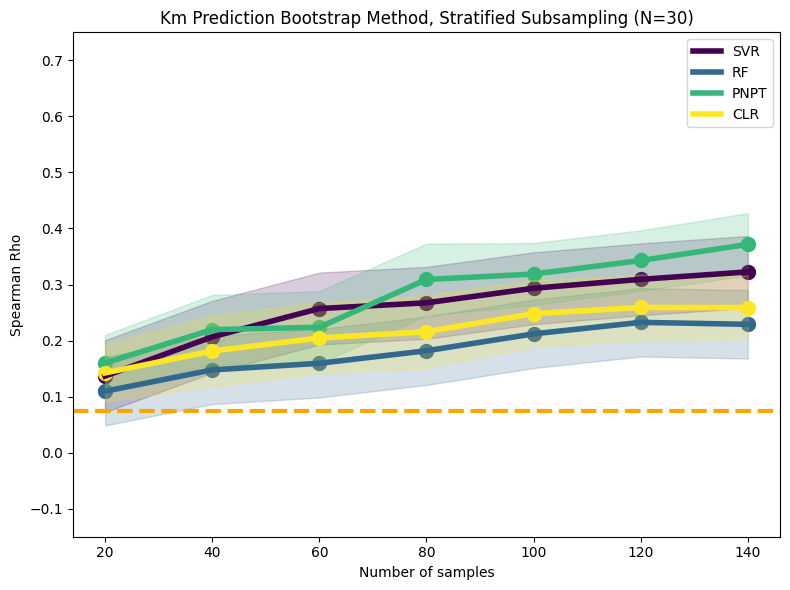

In [114]:
ALPHA = 0.2
# same as above but with confidence intervals shaded
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(data_set_sizes, np.mean(km_score_dict["SVR_one-hot"], axis=0), linewidth=4, label="SVR", color=colors[0])
ax.scatter(data_set_sizes, np.mean(km_score_dict["SVR_one-hot"], axis=0), s=100, color=colors[0])
ax.fill_between(data_set_sizes, np.mean(km_score_dict["SVR_one-hot"], axis=0)-confidence_interval(km_score_dict["SVR_one-hot"], z=1.96),
                 np.mean(km_score_dict["SVR_one-hot"], axis=0)+confidence_interval(km_score_dict["SVR_one-hot"], z=1.96), alpha=ALPHA, color=colors[0])


ax.plot(data_set_sizes, np.mean(km_score_dict["RF_esm"], axis=0), linewidth=4, label="RF", color=colors[1])
ax.scatter(data_set_sizes, np.mean(km_score_dict["RF_esm"], axis=0), s=100, color=colors[1])
ax.fill_between(data_set_sizes, np.mean(km_score_dict["RF_esm"], axis=0)-confidence_interval(km_score_dict["RF_esm"], z=1.96),
                 np.mean(km_score_dict["RF_esm"], axis=0)+confidence_interval(km_score_dict["RF_esm"], z=1.96), alpha=ALPHA, color=colors[1])


ax.plot(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"],  linewidth=4, label="PNPT", color=colors[2])
ax.scatter(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"], s=100, color=colors[2])
ax.fill_between(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"]-pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["95_CI"],
                 pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["mean_spearman"]+pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_PNPT_Tranception"]["95_CI"],
                 alpha=ALPHA,
                 color=colors[2])

ax.plot(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"],  linewidth=4, label="CLR", color=colors[3])
ax.scatter(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"], s=100, color=colors[3])
ax.fill_between(data_set_sizes, pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"]-pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["95_CI"],
                 pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["mean_spearman"]+pnpt_results_km[pnpt_results_km["model_name_suffix"] == "kinase_20240822_multi4_Tranception"]["95_CI"],
                 alpha=ALPHA,
                 color=colors[3])

ax.set_xlabel("Number of samples")
ax.set_ylabel("Spearman Rho")
ax.set_ylim(-0.15,0.75)
ax.legend()
ax.set_title("Km Prediction Bootstrap Method, Stratified Subsampling (N=30)")
ax.axhline(y=0.0747, color='orange', linestyle='--',linewidth=3, label="Tranception Zero-Shot")
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/aggregate_km_dataset_titration_95ci.pdf")

# Scatter kcat and Km rho for largest dataset size

In [16]:
kcat_pnpt_results_140 = {
    "multi_CLR_ESM2":	.344,
    "multi_PNPT_ESM2":	.456,
    "multi_PNPT_MSAT":	.439,
    "multi_PNPT_Tranception":	.458,
    "multi_CLR_Tranception":	.492,
    "single_CLR_ESM2":	.385,
    "single_PNPT_Tranception":	.460,
    "single_CLR_Tranception":	.480,
    "single_RF_OHE": np.mean(kcat_score_dict["RF_one-hot"][:,-1]),
    "single_SVR_OHE": np.mean(kcat_score_dict["SVR_one-hot"][:,-1]),
    "single_RF_ESM2": np.mean(kcat_score_dict["RF_esm"][:,-1]),
    "single_SVR_ESM2": np.mean(kcat_score_dict["SVR_esm"][:,-1]),
}

km_pnpt_results_140 = {
    "multi_CLR_ESM2":	.112,
    "multi_PNPT_ESM2":	.311,
    "multi_PNPT_MSAT":	.260,
    "multi_PNPT_Tranception":	.372,
    "multi_CLR_Tranception":	.259,
    "single_PNPT_Tranception":	.340,
    "single_CLR_Tranception":	.261,
    "single_CLR_ESM2":	.133,
    "single_RF_OHE": np.mean(km_score_dict["RF_one-hot"][:,-1]),
    "single_SVR_OHE": np.mean(km_score_dict["SVR_one-hot"][:,-1]),
    "single_RF_ESM2": np.mean(km_score_dict["RF_esm"][:,-1]),
    "single_SVR_ESM2": np.mean(km_score_dict["SVR_esm"][:,-1]),
}

In [22]:
architecure_color_dict = {
    "CLR": colors[3],
    "PNPT": colors[2],
    "RF": colors[1],
    "SVR": colors[0],
}

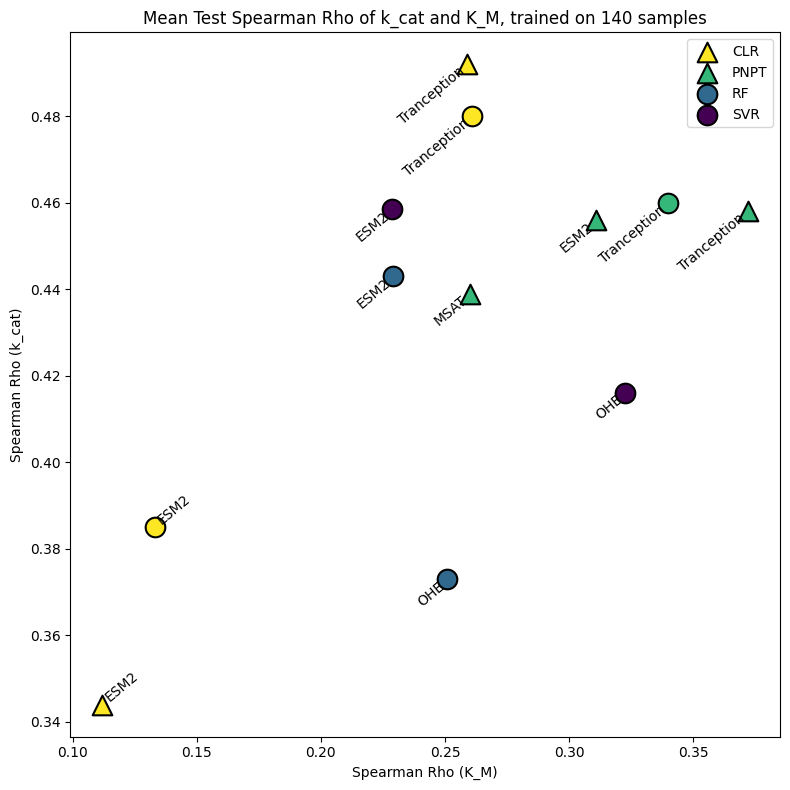

In [28]:
fig, ax = plt.subplots(figsize=(8,8))

ROTATION = 40
legend_labels = set()
for key in km_pnpt_results_140.keys():

    label = key.split("_")[1]
    #annotation = key.split("_")[0] + "_" + key.split("_")[-1]
    annotation = key.split("_")[-1]


    ax.scatter(km_pnpt_results_140[key], kcat_pnpt_results_140[key], 
               label=label if label not in legend_labels else "__nolabel__",
                 s=200, color=architecure_color_dict[key.split("_")[1]],
                 marker="^" if "multi" in key else "o",
                 edgecolor="black", linewidth=1.5,
                 ) 
    if label not in legend_labels:
        legend_labels.add(label)

    
    if km_pnpt_results_140[key] < 0.2:
        ax.annotate(annotation, (km_pnpt_results_140[key], kcat_pnpt_results_140[key]), ha='left', va="bottom", rotation=ROTATION)
    else:
        ax.annotate(annotation, (km_pnpt_results_140[key], kcat_pnpt_results_140[key]), ha='right', va="top", rotation=ROTATION)
  
ax.set_xlabel("Spearman Rho (K_M)")
ax.set_ylabel("Spearman Rho (k_cat)")
ax.set_title("Mean Test Spearman Rho of k_cat and K_M, trained on 140 samples")
ax.legend()
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/kcat_vs_km_hyperparam.pdf")

## Aggregate kcat and Km Comparison
___

In [109]:
for key in km_pnpt_results_140.keys():
    print(key, np.mean((km_pnpt_results_140[key], kcat_pnpt_results_140[key])))
    
print("RF_one-hot", np.mean((np.mean(km_score_dict["RF_one-hot"][:,-1],), np.mean(kcat_score_dict["RF_one-hot"][:,-1]))))
print("RF_esm", np.mean((np.mean(km_score_dict["RF_esm"][:,-1],), np.mean(kcat_score_dict["RF_esm"][:,-1]))))

print("SVR_one-hot", np.mean((np.mean(km_score_dict["SVR_one-hot"][:,-1],), np.mean(kcat_score_dict["SVR_one-hot"][:,-1]))))
print("SVR_esm", np.mean((np.mean(km_score_dict["SVR_esm"][:,-1],), np.mean(kcat_score_dict["SVR_esm"][:,-1]))))

multi4_ESM2 0.22799999999999998
multi4_PNPT_ESM2 0.3835
multi4_PNPT_MSAT 0.34950000000000003
multi4_PNPT_Tranception 0.41500000000000004
multi4_Tranception 0.3755
single_PNPT_Tranception 0.4
single_Tranception 0.3705
RF_one-hot 0.3119327731092437
RF_esm 0.3360410830999066
SVR_one-hot 0.36931839402427635
SVR_esm 0.34366479925303456
